## Demonstration of figure finder
Before starting make sure that you have set the path where you want to dump all the figures (in shell/ff_setup, FIGURE_DUMP="your/path/here")
and run the setup script to install it: by running
> bash shell/ff_setup setup


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import os
import figure_finder as ff



Database is empty


First - lets make some figures and save them in the figure dump folder

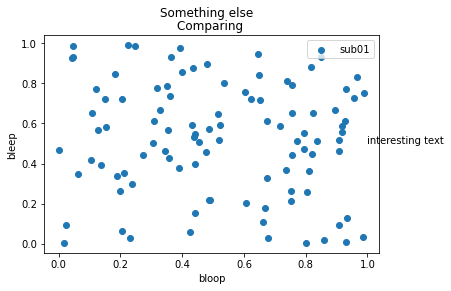

In [2]:
# scatter demo 
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x,y, label='sub01')
plt.xlabel('bloop')
plt.ylabel('bleep')
plt.title('Comparing ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')


# Now we can save the figure in the fig_dump folder
# >> we can specify the name of the file, or ff will 
# extract the title from the figure. 
# We can also specify the tags we want to save with this fig. ff will 
# automatically find *any* text in the fig (legend, axes, text) and 
# scrape these to include in the tags (so don't worry too much)
# Figure name & the date will also be saved as tags
ff.save_figure_with_tags(fig, fig_name='scatter-demo', fig_tags=['optional-tags'])
# see the function for other options (e.g., dpi, )

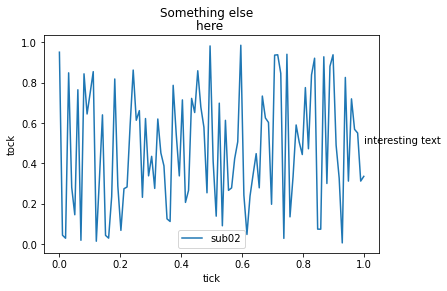

In [3]:
# Make line demo 
x = np.linspace(0,1, 100)
y = np.random.random(100)
plt.plot(x,y, label='sub02')
plt.xlabel('tick')
plt.ylabel('tock')
plt.title('here ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')

ff.save_figure_with_tags(fig, fig_name='line-demo')

Now we have 2 figures in the figure_dump folder
Lets see how these have been recorded in the database and what we can do

In [4]:
# Figure database is a csv folder inside the figure dump folder
# > we can load this and look at the entried
fig_db = ff.load_figure_db()
fig_db

[{'name': 'scatter-demo.png',
  'date': '2022-09-21_11-53-17',
  'path': '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_dump/scatter-demo.png',
  'tags': ['1.0',
   'bleep',
   'Something',
   '1.2',
   'else',
   'optional-tags',
   '0.2',
   '0.4',
   '0.6',
   'scatter-demo.png',
   '0.0',
   '0.8',
   'Something_else',
   'Comparing',
   'sub01',
   '2022-09-21_11-53-17',
   '−0.2',
   'text',
   'bloop',
   'interesting'],
  'cwd': '/mnt/export/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_finder',
  'nb_path': '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_finder/example.ipynb'},
 {'name': 'line-demo.png',
  'date': '2022-09-21_11-53-24',
  'path': '/data1/projects/dumoulinlab/Lab_members/Marcus/programs/figure_dump/line-demo.png',
  'tags': ['1.0',
   'Something',
   'here',
   '1.2',
   'else',
   'tock',
   'line-demo.png',
   '0.2',
   '0.4',
   '0.6',
   '0.0',
   '0.8',
   'Something_else',
   'sub02',
   '−0.2',
   'tick',


fig_db is a list of dictionaries, with each entry in the list corresponding to a particular figure
Each figure has the:
* 'date' : date that fig was saved
* 'name' : name of the file
* 'path' : path to the fig (.png file)
* 'tags' : tags - those extracted from the fig, also those which the user specified before hand. these can be used to search for your figures, (both inclusive & exclusive)
* 'cwd' : the directory where the fig was generated 
* 'nb_path' : the notebook where the figure was generated



In [5]:
# You can see that all the text in the figure has been extracted and saved as tags...
print(fig_db[0]['tags'])
# We can use these tags to search for the figure

['1.0', 'bleep', 'Something', '1.2', 'else', 'optional-tags', '0.2', '0.4', '0.6', 'scatter-demo.png', '0.0', '0.8', 'Something_else', 'Comparing', 'sub01', '2022-09-21_11-53-17', '−0.2', 'text', 'bloop', 'interesting']


In [7]:
# Now a demo search for a figure...
# both figures had the text "interesting text" - so if we search for this 2 entries come up
match_fig = ff.find_fig_with_tags(['interesting'])
print(f'Found {len(match_fig)} matching figures...')

fig name not specified, looking at all figs
2


In [10]:
# we can refine the search using more tags
match_fig = ff.find_fig_with_tags(['interesting', 'scatter'])
print(f'Found {len(match_fig)} matching figures...')

# we can see the matching figure is the scatter plot... 
print(match_fig[0]['name'])


fig name not specified, looking at all figs
Found 1 matching figures...
scatter-demo.png


In [11]:
# OR we can refine the search using by excluding certain tags
match_fig = ff.find_fig_with_tags(['interesting'], exclude=['scatter'])
print(f'Found {len(match_fig)} matching figures...')

# we can see the matching figure is NOT the scatter plot... 
print(match_fig[0]['name'])


fig name not specified, looking at all figs
Found 1 matching figures...
line-demo.png


The tags can be any text which is present in the figure (or which was specified)
It can also be the date 

In [15]:
# We can find  out more about the matching figure in from the entries in the db (e.g., looking at name, date, nb_path)
# Or we can simply load the figure, using the same search terms 
# ff.show_fig_with_tags(['interesting'], exclude=['scatter'])

# For more detail we can print the code which was used to generate this figure...
ff.print_matching_code_file(['interesting'], exclude=['scatter'])

fig name not specified, looking at all figs
Opening line-demo.png
****************** START OF FIGURE CODE ******************
**********************************************************
# Make line demo 
x = np.linspace(0,1, 100)
y = np.random.random(100)
plt.plot(x,y, label='sub02')
plt.xlabel('tick')
plt.ylabel('tock')
plt.title('here ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')

# a = ff.scrape_tags_from_figure(fig)
ff.save_figure_with_tags(fig, fig_name='line-demo')
******************   END OF FIGURE CODE ******************
**********************************************************


Note - if you try and save a figure with the same name, then it will ask you whether you want to overwrite ('o'), skip ('s') or append the date to the file name. 
You can edit the function so that it doen't ask you every time

In [ ]:
# scatter demo 
x = np.random.random(100)
y = np.random.random(100)
plt.scatter(x,y, label='sub01')
plt.xlabel('bloop')
plt.ylabel('bleep')
plt.title('Comparing ')
plt.text(1,.5, 'interesting text')
plt.legend()
fig = plt.gcf()
fig.suptitle('Something else')

ff.save_figure_with_tags(fig, fig_name='scatter-demo', fig_tags=['optional-tags']) # SAME NAME AS BEFORE...

# Best practice is probably to specify a new name - but this still works....

Finally - there is the housekeeping for the database. 
If you delete a png, then you can use ff.clean_csv(), which compares the csv database to the list of png files in the folder. If they don't match it will delete the corresponding entry
This is automatically run on importing the toolbox (init file) 

You can also remove entries using the function below...

In [ ]:
ff.remove_fig_with_tags(fig_name='scatter-demo')